In [ ]:
import pandas as pd

In [ ]:
#carregando o df e nomeando as colunas
df = pd.read_csv('https://pycourse.s3.amazonaws.com/banknote_authentication.txt', header= None, names= ['variance', 'skewness', 'curtosis', 'entropy', 'class'])

In [ ]:
#verificando as 5 primeiras linhas
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


**Qual o tamanho desse dataset (número de linhas, número de colunas)?**



In [ ]:
df.shape

(1372, 5)

In [ ]:
#descrição dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


**Qual variável possui o maior range (diferença entre valor máximo e mínimo)?**

R: Skewness

In [ ]:
print((df['variance'].max())-(df['variance'].min()))
print((df['skewness'].max())-(df['skewness'].min()))
print((df['curtosis'].max())-(df['curtosis'].min()))
print((df['entropy'].max())-(df['entropy'].min()))

13.8669
26.7247
23.2135
10.9977


**Qual a média da coluna skewness?**

In [ ]:
df['skewness'].mean()

1.9223531206393603

**Qual a média da coluna entropy?**


In [ ]:
df['entropy'].mean()

-1.191656520043731

Qual a mediana da coluna variance?

R: ver mean na tabela - 

In [ ]:
df['variance'].median()

0.49618

**Qual o desvio padrão da coluna curtosis?**

In [ ]:
df['curtosis'].std()

4.310030090106595

In [ ]:
#Descreve os dados, podemos ver as repostas das questões acima na tabela
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
#contagem de 0 e 1 da variavel class
df.groupby(['class'])['class'].count().sort_values(ascending=False)

class
0    762
1    610
Name: class, dtype: int64

**Qual a porcentagem de exemplos do dataset que são cédulas falsas (class=1)?**

In [ ]:
perc = (610*100)/1372
print('A porcentagem de cédulas falsas (class = 1) é de: %2.2f' %perc + "%")

A porcentagem de cédulas falsas (class = 1) é de: 44.46%


**Qual o valor da correlação de Pearson entre as variáveis skewness e curtosis?**

In [ ]:
df['skewness'].corr(df['curtosis'])

-0.7868952243065794

In [ ]:
#Dividindo o df em variáveis de entrada e variável alvo
X = df.drop(['class'] , axis= 1)
y = df['class']

In [ ]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [ ]:
#Dividindo o X e y em cortes de treino e test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.3)

In [ ]:
#normalizando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# importando as bibliotecas para criação dos modelos e a metrica de acurácia para avaliar os modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

**Qual a acurácia do KNN no conjunto de teste?**



In [ ]:
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train)
KNN_pred = clf_KNN.predict(X_test)
acuracia = accuracy_score(y_test, KNN_pred)
print('Acurácia: %f' % acuracia)

Acurácia: 0.997573


**Qual a acurácia da Árvore de Decisão no conjunto de teste?**

In [ ]:
clf_arvore = DecisionTreeClassifier(random_state=1)
clf_arvore.fit(X_train, y_train)
arvore_pred = clf_arvore.predict(X_test)
acuracia = accuracy_score(y_test, arvore_pred)
print('Acurácia: %f' % acuracia)

Acurácia: 0.987864


**Qual a acurácia do Random Forest no conjunto de teste?**

In [ ]:
clf_floresta = RandomForestClassifier(max_depth=8, random_state=1)
clf_floresta.fit(X_train, y_train)
floresta_pred = clf_floresta.predict(X_test)
acuracia = accuracy_score(y_test, floresta_pred)
print('Acurácia: %f' % acuracia)

Acurácia: 0.995146


**Qual a acurácia do SVM no conjunto de teste?**

In [ ]:
clf_svm = SVC(gamma='auto',kernel='rbf', random_state=1)
clf_svm.fit(X_train, y_train)
svm_pred = clf_svm.predict(X_test)
acuracia = accuracy_score(y_test, svm_pred)
print('Acurácia: %f' % acuracia)

Acurácia: 1.000000


**Qual a acurácia da rede MLP no conjunto de teste?**

In [ ]:
clf_mlp = MLPClassifier(hidden_layer_sizes=(2,), solver='lbfgs',random_state=1)
clf_mlp.fit(X_train, y_train)
mlp_pred = clf_mlp.predict(X_test)
acuracia = accuracy_score(y_test, mlp_pred)
print('Acurácia: %f' % acuracia)

Acurácia: 1.000000


**Analisando o valor da importância relativa das features do Random Forest (atributo feature_importances_), qual feature melhor contribuiu para a predição de class?**

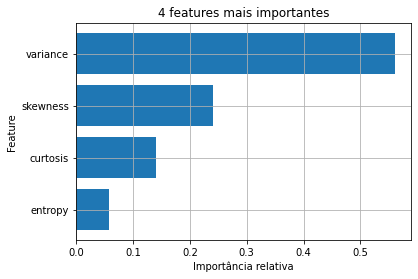

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# importâncias das features
fp = clf_floresta.feature_importances_
n = 4
i = np.argsort(fp)[-n:]
cols = X.columns
plt.barh(cols[i], fp[i])
plt.grid()
plt.title(f"{n} features mais importantes")
plt.xlabel("Importância relativa")
plt.ylabel("Feature")
plt.show() 

**Qual o valor da importância relativa da feature skewness?**

In [ ]:
#depois que foi o fp (feature_importances_) se chamamos ele, ele tras um array com os valores de da importancia de cada variável
#nesta caso precisamos olhar para o segundo número que corresponde o skewness
fp

array([0.56066718, 0.24058589, 0.14022782, 0.05851911])